In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [8]:
df0 = pd.read_csv('Cal5vsSMARTS2_BTS.csv', index_col = 0, parse_dates = [0])
df1 = pd.read_csv('Cal5vsSMARTS2_UTC.csv', index_col = 0, parse_dates = [0])

In [9]:
df0['diff'] = df0['TotIrr_S5'] - df0['Smarts2']
df1['diff'] = df1['TotIrr_S5'] - df1['Smarts2']

No handles with labels found to put in legend.
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")
No handles with labels found to put in legend.
/srv/conda/lib/python3.6/site-packages/matplotlib/axes/_base.py:1334: MatplotlibDeprecationWarning: 
box-forced
  "2.2", "box-forced", obj_type="keyword argument")


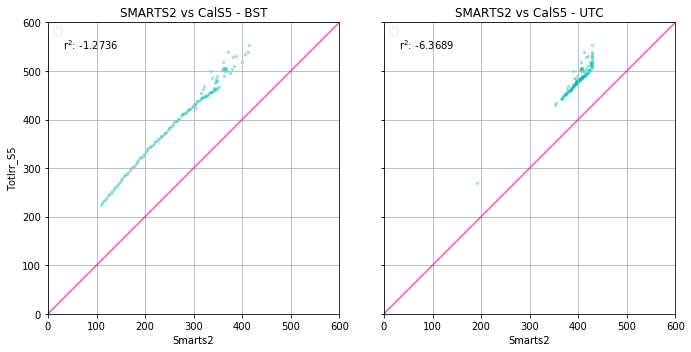

In [11]:
dfs = [['SMARTS2 vs CalS5 - BST', df0], ['SMARTS2 vs CalS5 - UTC', df1]]
dfs0 = []
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5), sharex = False, sharey = True)
ax_ratio = 1.0
for i, df in enumerate(dfs):
    title, df = df
    df = df.dropna()
    trimm_val = np.percentile(df['diff'], 95)
    df = df.loc[df['diff'] >= trimm_val, :]
    #fig.axes[0].set_position([0.10, 0.10, 0.40, 0.40]) # with ax.get_position() one can get the location and dimensions
    df.plot.scatter(y = df.columns[0], x = df.columns[1], grid = True, alpha = 0.33, marker = '.', xlim = (0, 600), 
                                                        ylim = (0, 600), title = title, ax = fig.axes[i], color = 'c')
    lin = np.linspace(0, 600, 2)
    fig.axes[i].plot(lin, lin, color = 'm', alpha = 0.5, linewidth = 2)
    r2 = r2_score(df['TotIrr_S5'], df['Smarts2'])
    fig.axes[i].text(0.05, 0.95, 'r$^2$: {:.4f}'.format(r2), transform = fig.axes[i].transAxes, verticalalignment = 'top', horizontalalignment = 'left')
    fig.axes[i].legend(framealpha = 0.5)
    xmin, xmax = fig.axes[i].get_xlim()
    ymin, ymax = fig.axes[i].get_ylim()
    fig.axes[i].set_aspect(abs((xmax-xmin)/(ymax-ymin))*ax_ratio, adjustable='box-forced')
    plt.tight_layout()

    

# 